### Page Rank Algorithm using Random walk method</b>

A directed graph has 2 components: nodes and edges where pages are nodes and hyperlinks are edges. The value of pagerank is the probability between 0 and 1

Random Walk Method
* Select random graph from python library
* Initialize all nodes with initial rank values at 0
* Randomly pick source nodes
* Create list to store neighbors of souce nodes
* Pick node from lists randomly and increment its rank
* Check if node is a sink node ( does not have outgoing edges)
    * yes:pick random node & increment rank
    * no: pick node from list & increment rank
* Continue untill resulting vector with rank for every single page converges

In [6]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import operator

In [7]:
g = nx.gnp_random_graph(10,0.5, directed = True)

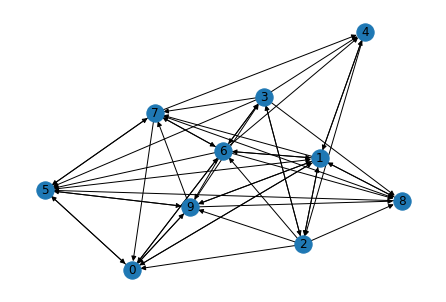

In [3]:
nx.draw(g,with_labels=True)
plt.show()

In [4]:
#pick source node randomly
x = random.choice([i for i in range(g.number_of_nodes())])
# initialize all nodes as 0
dict_count = {}
for i in range(g.number_of_nodes()):
               dict_count[i]=0
dict_count[x] = dict_count[x]+1

#Look at neighbours of x
for i in range(1000000):
               #create list to store neighbors
               list_n = list(g.neighbors(x))
               if (len(list_n) == 0):
                    x= random.choice([i for i in range(g.number_of_nodes())])
                    dict_count[x]= dict_count[x]+1
                    
               else:
                    x= random.choice(list_n)
                    dict_count[x]= dict_count[x]+1

In [5]:
# verify
p = nx.pagerank(g)
#sort values
sort_p = sorted(p.items(),key=operator.itemgetter(1))
sort_rw = sorted(dict_count.items(), key = operator.itemgetter(1))
print(sort_p)

print(sort_rw)

[(3, 0.05053747191846939), (4, 0.06928579223607031), (2, 0.07249250340442341), (6, 0.09399823834627018), (8, 0.09483602975724624), (7, 0.09560208142041264), (9, 0.10786184685581872), (0, 0.11496476464813277), (5, 0.12841440205056365), (1, 0.17200686936259266)]
[(3, 41111), (4, 63489), (2, 64671), (8, 93126), (6, 93656), (7, 96366), (9, 111803), (0, 120113), (5, 133029), (1, 182637)]


Thus we see that after some iterations page rank obtained from random walk method matches with values obtained from built in function of python.